# Test validity step 2 : $P(s_c | ...) \propto (s_c - s_{c,WF})^t (C^{-1} + (E^t (B^t N^{-1} B)^{-1} E)^{-1}) (s_c - s_{c,WF})$

In [1]:
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
from jax import random, dtypes
import jax.numpy as jnp
import jax.scipy as jsp
import jax_healpy as jhp
import jax.experimental.sparse as jsparse
import chex as chx
import scipy
import healpy as hp
import astropy.io.fits as fits
import camb
import numpyro.distributions as dist
import toml
import lineax as lx
import fgbuster
from fgbuster import get_instrument, get_observation, get_noise_realization
from lanczos_test import *

import micmac as micmac

In [2]:
PRNGKey = random.PRNGKey(0)


In [3]:
sys.path.append(os.path.dirname(os.path.abspath('')))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('')))+'/tutorials/')

In [4]:
# working_directory_path = os.path.abspath('') + '/'
working_directory_path = '/Users/mag/Documents/PHD1Y/Space_Work/Pixel_non_P2D/MICMAC/test_playground/Paper_runs/'
directory_save_file = working_directory_path + 'save_directory/'
directory_toml_file = working_directory_path + 'main_params/'
directory_additional_params = working_directory_path + 'additional_params/'

path_toml_file = directory_toml_file + 'corr_cutsky_LB_r2_v0a.toml'
path_additional_params = directory_additional_params + 'add_corr_cutsky_LB_d0s0_nside0_v0a.toml'

In [5]:
foreground_bool = True

In [6]:
MICMAC_sampler_obj = micmac.create_MICMAC_sampler_from_toml_file(path_toml_file)

No spatial variability case



>>> Tree of spv config as passed by the User:
root
  nside_spv
    default: [0]
    f0
      default: None
      b0
        default: None
      b1
        default: None
      b2
        default: None
      b3
        default: None
      b4
        default: None
      b5
        default: None
      b6
        default: None
      b7
        default: None
      b8
        default: None
      b9
        default: None
      b10
        default: None
      b11
        default: None
      b12
        default: None
    f1
      default: None
      b0
        default: None
      b1
        default: None
      b2
        default: None
      b3
        default: None
      b4
        default: None
      b5
        default: None
      b6
        default: None
      b7
        default: None
      b8
        default: None
      b9
        default: None
      b10
        default: None
      b11
        default: None
      b12
        default: None

>>> Tree of spv config after filling the missing val

In [7]:
with open(path_additional_params) as f:
    dictionary_additional_parameters = toml.load(f)
f.close()

In [8]:
instrument = fgbuster.get_instrument(MICMAC_sampler_obj.instrument_name)

fgs_model_ = dictionary_additional_parameters['fgs_model']

np.random.seed(dictionary_additional_parameters['seed_realization_input'])
noise_map = get_noise_realization(MICMAC_sampler_obj.nside, instrument)[:, 1:, :]

if foreground_bool:
    fgs_model = dictionary_additional_parameters['fgs_model']
    np.random.seed(dictionary_additional_parameters['seed_realization_input'])
    freq_maps_fgs_denoised = get_observation(instrument, fgs_model_, nside=MICMAC_sampler_obj.nside, noise=False)[:, 1:, :]   # keep only Q and U
    

    freq_maps_fgs = freq_maps_fgs_denoised + noise_map
else:
    freq_maps_fgs = noise_map
instrument

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


,frequency,depth_p,depth_i,fwhm,f_sky,status,reference,type,note,experiment
0,40.0,37.42,26.46,70.5,1.0,forecast,"arXiv:2202.02773, Table 13",satellite,Different instruments at the same freq were co...,LiteBIRD
1,50.0,33.46,23.66,58.5,1.0,forecast,"arXiv:2202.02773, Table 13",satellite,Different instruments at the same freq were co...,LiteBIRD
2,60.0,21.31,15.07,51.1,1.0,forecast,"arXiv:2202.02773, Table 13",satellite,Different instruments at the same freq were co...,LiteBIRD
3,68.0,16.87,11.93,47.1,1.0,forecast,"arXiv:2202.02773, Table 13",satellite,Different instruments at the same freq were co...,LiteBIRD
4,78.0,12.07,8.53,43.8,1.0,forecast,"arXiv:2202.02773, Table 13",satellite,Different instruments at the same freq were co...,LiteBIRD
5,89.0,11.30,7.99,41.5,1.0,forecast,"arXiv:2202.02773, Table 13",satellite,Different instruments at the same freq were co...,LiteBIRD
6,100.0,6.56,4.64,37.8,1.0,forecast,"arXiv:2202.02773, Table 13",satellite,Different instruments at the same freq were co...,LiteBIRD
7,119.0,4.58,3.24,33.6,1.0,forecast,"arXiv:2202.02773, Table 13",satellite,Different instruments at the same freq were co...,LiteBIRD
8,140.0,4.79,3.39,30.8,1.0,forecast,"arXiv:2202.02773, Table 13",satellite,Different instruments at the same freq were co...,LiteBIRD
9,166.0,5.57,3.94,28.9,1.0,forecast,"arXiv:2202.02773, Table 13",satellite,Different instruments at the same freq were co...,LiteBIRD


F_sky =  0.6038818359375


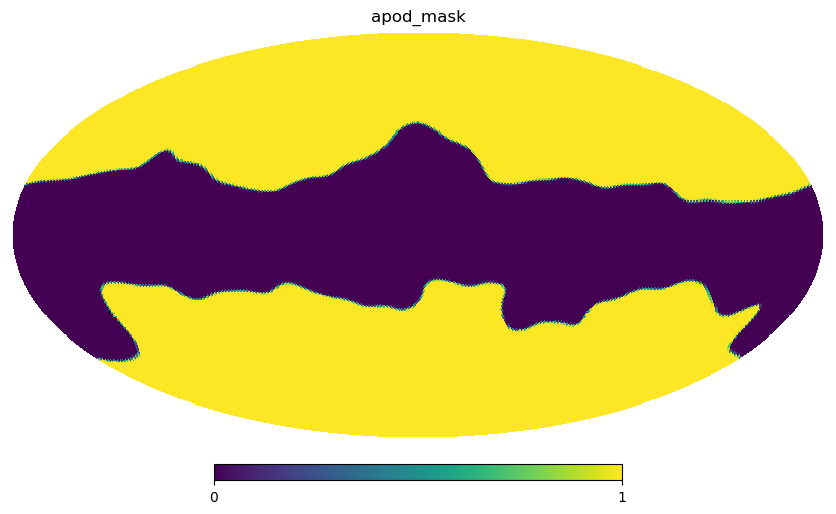

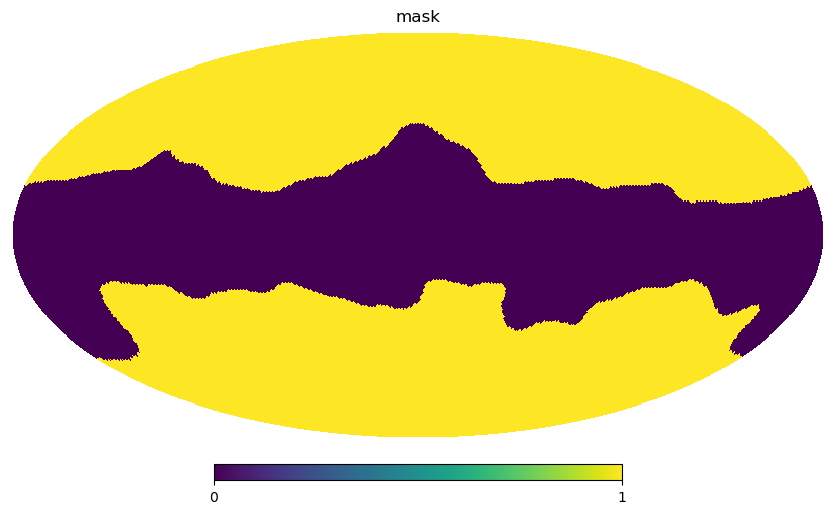

In [9]:
# path_mask = "/Users/mag/Documents/PHD1Y/Masks/mask_SAT_apodized.fits"
path_mask = "/Users/mag/Documents/PHD1Y/Masks/Planck_mask_fsky_60.fits"

relative_treshold = 3*1e-1

apod_mask = hp.ud_grade(hp.read_map(path_mask),nside_out=MICMAC_sampler_obj.nside, dtype=np.float64)
mask = np.copy(apod_mask)

# mask[apod_mask>0] = 1
mask[apod_mask<=relative_treshold] = 0
mask[apod_mask>relative_treshold] = 1

mask = mask.astype(np.int64)

print("F_sky = ", np.sum(mask)/len(mask))

hp.mollview(apod_mask, title='apod_mask')
hp.mollview(mask, title='mask')


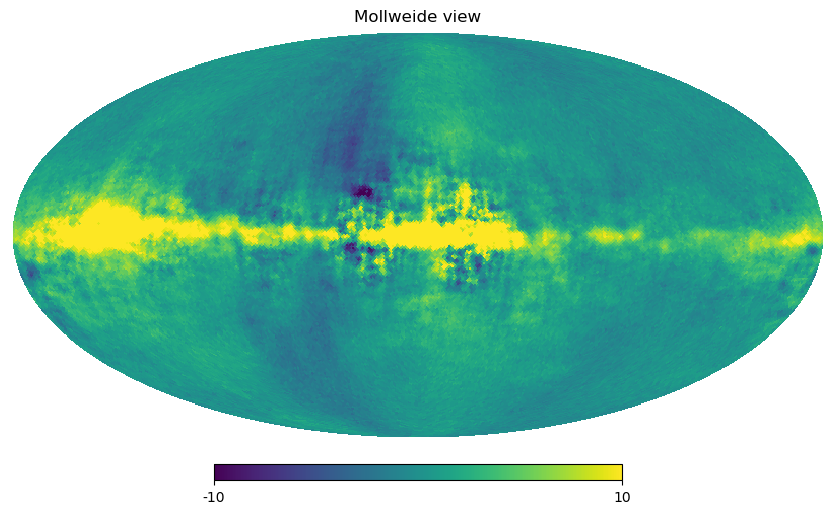

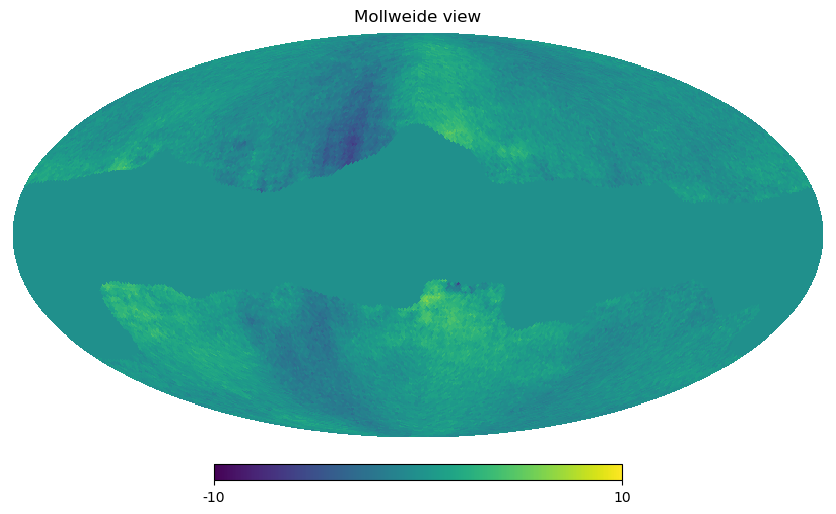

In [10]:
hp.mollview(freq_maps_fgs[2,0], min=-10, max=10) # Freq, nstokes, n_pix
hp.mollview(freq_maps_fgs[2,0]*mask, min=-10, max=10) # Freq, nstokes, n_pix

In [11]:
# mask = np.ones(MICMAC_sampler_obj.n_pix)

MICMAC_sampler_obj.mask = np.array(mask)

In [12]:
# freq_inverse_noise = micmac.get_noise_covar(instrument['depth_p']/reduction_noise, MICMAC_sampler_obj.nside)
freq_inverse_noise_0 = micmac.get_noise_covar(instrument['depth_p'], MICMAC_sampler_obj.nside) #MICMAC_sampler_obj.freq_inverse_noise

freq_inverse_noise_masked = micmac.get_noise_covar_extended(instrument['depth_p'], MICMAC_sampler_obj.nside)*MICMAC_sampler_obj.mask

MICMAC_sampler_obj.freq_inverse_noise = freq_inverse_noise_masked

freq_inverse_noise = freq_inverse_noise_masked

MICMAC_sampler_obj.freq_noise_c_ell = micmac.get_true_Cl_noise(np.array(instrument['depth_p']), MICMAC_sampler_obj.lmax)

In [13]:
indices_polar = np.array([1,2,4])
partial_indices_polar = indices_polar[:MICMAC_sampler_obj.nstokes]

In [14]:
init_mixing_matrix_obj = micmac.InitMixingMatrix(freqs=np.array(instrument['frequency']), 
                                                 ncomp=MICMAC_sampler_obj.n_components, 
                                                 pos_special_freqs=MICMAC_sampler_obj.pos_special_freqs, 
                                                 spv_nodes_b=MICMAC_sampler_obj.spv_nodes_b)
init_params = init_mixing_matrix_obj.init_params()

mixing_matrix_obj = micmac.MixingMatrix(instrument['frequency'], 
                                        n_components=MICMAC_sampler_obj.n_components, 
                                        params=init_params, 
                                        pos_special_freqs=MICMAC_sampler_obj.pos_special_freqs, 
                                        spv_nodes_b=MICMAC_sampler_obj.spv_nodes_b, 
                                        nside=MICMAC_sampler_obj.nside)

mixing_matrix_sampled = mixing_matrix_obj.get_B()

invBtinvNB = micmac.get_inv_BtinvNB(freq_inverse_noise, mixing_matrix_sampled)
BtinvN_sqrt = micmac.get_BtinvN(np.sqrt(freq_inverse_noise), mixing_matrix_sampled)#*mask

BtinvN = micmac.get_BtinvN(freq_inverse_noise, mixing_matrix_sampled)


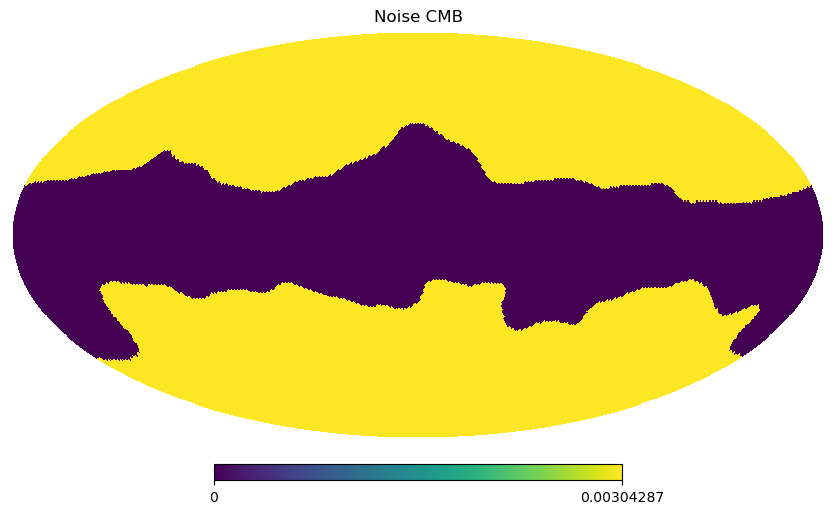

In [15]:
hp.mollview(invBtinvNB[0,0], title='Noise CMB')

In [16]:
np.random.seed(dictionary_additional_parameters['seed_realization_input']+1)

input_freq_maps, input_cmb_maps, theoretical_red_cov_r0_total, theoretical_red_cov_r1_tensor = MICMAC_sampler_obj.generate_input_freq_maps_from_fgs(freq_maps_fgs, return_only_freq_maps=False)

input_freq_maps_masked = input_freq_maps*mask
# input_cmb_maps = input_cmb_maps*mask

Calculating spectra from CAMB !
Calculating spectra from CAMB !


In [17]:
s_cML = micmac.get_Wd(freq_inverse_noise, mixing_matrix_sampled, input_freq_maps_masked, jax_use=True)[0, :, :]

In [18]:
n_frequencies = MICMAC_sampler_obj.n_frequencies
n_components = MICMAC_sampler_obj.n_components
nstokes = MICMAC_sampler_obj.nstokes
lmin = MICMAC_sampler_obj.lmin
lmax = MICMAC_sampler_obj.lmax
nside = MICMAC_sampler_obj.nside
n_iter = MICMAC_sampler_obj.n_iter
n_pix = 12*nside**2

In [19]:
red_cov_matrix_sample = theoretical_red_cov_r0_total + MICMAC_sampler_obj.r_true * theoretical_red_cov_r1_tensor
# red_cov_matrix_sample = theoretical_red_cov_r0_total + 1e-3 * theoretical_red_cov_r1_tensor

In [20]:
def get_fluctuating_term_maps_v2e(self, 
                                  red_cov_matrix_sqrt, 
                                  invBtinvNB, 
                                  BtinvN_sqrt, 
                                  jax_key_PNRG, 
                                  map_random_realization_xi=None, 
                                  map_random_realization_chi=None, 
                                  initial_guess=jnp.empty(0),
                                  precond_func=None):
    """ Sampling step 2 : fluctuating term

        Solve fluctuation term:
            (Id + C^{1/2} N_c^{-1} C^{1/2}) C^{-1/2} \zeta = xi + C^{1/2} N_c^{-1/2} \chi

        Or, fully developped:
            (Id + C^{1/2} (E^t (B^t N^{-1} B)^{-1} E)^{-1} C^{1/2}) \zeta = C^{1/2} C^{-1/2} xi + C^{1/2} (E^t (B^t N^{-1} B)^{-1} E)^{-1} E^t (B^t N^{-1} B)^{-1} B^t N^{-1/2} \chi

        This ensures:
        <\zeta \zeta^t> = (C^{-1} + N_c^{-1})^{-1}
        < \zeta > = 0

        Note C is assumed to be block diagonal

        Parameters
        ----------
        :param red_cov_matrix_sqrt: term C^{1/2}, matrix square root of CMB covariance matrices in harmonic domain, dimension [lmin:lmax, nstokes, nstokes]
        :param invBtinvNB: matrix (B^t N^{-1} B)^{-1}, dimension [component, component, n_pix]
        :param BtinvN_sqrt: matrix B^T N^{-1/2}, dimension [component, frequencies, n_pix]
        :param jax_key_PNRG: random key for JAX PNRG
        :param map_white_noise_xi: set of maps 0 with mean and variance 1, which will be used to compute the fluctuation term ; dimension [nstokes, n_pix]
        :param map_white_noise_chi: set of maps 0 with mean and variance 1, which will be used to compute the fluctuation term ; dimension [nfreq, nstokes, n_pix]
        :param initial_guess: initial guess for the CG, default jnp.empty(0) (then set to 0) ; dimension [nstokes, n_pix]
        :param precond_func: function preconditioner for the CG, default None

        Returns
        -------
        :return: Fluctuation maps [nstokes, n_pix] for s_c sampling
    """

    # Chex test for arguments
    chx.assert_axis_dimension(red_cov_matrix_sqrt, 0, self.lmax + 1 - self.lmin)
    chx.assert_axis_dimension(invBtinvNB, 2, self.n_pix)
    chx.assert_axis_dimension(BtinvN_sqrt, 1, self.n_frequencies)
    chx.assert_axis_dimension(BtinvN_sqrt, 2, self.n_pix)

    jax_key_PNRG, jax_key_PNRG_xi = random.split(jax_key_PNRG) # Splitting of the random key to generate a new one

    # Creation of the random maps if they are not given
    if map_random_realization_xi is None:
        # If no random maps are provided, then it is computed within the routine
        print("Recalculating xi !")
        map_random_realization_xi = jax.random.normal(jax_key_PNRG_xi, shape=(self.nstokes,self.n_pix))/jhp.nside2resol(self.nside)

    jax_key_PNRG, *jax_key_PNRG_chi = random.split(jax_key_PNRG,self.n_frequencies+1) # Splitting of the random key to generate a new one
    if map_random_realization_chi is None:
        # If no random maps are provided, then it is computed within the routine
        print("Recalculating chi !")
        def fmap(random_key):
            random_map = jax.random.normal(random_key, shape=(self.nstokes,self.n_pix))
            # return self.get_band_limited_maps(random_map)
            return random_map
        map_random_realization_chi = jax.vmap(fmap)(jnp.array(jax_key_PNRG_chi)) # Generating a different random Gaussian map for each frequency

        chx.assert_shape(map_random_realization_chi, (self.n_frequencies, self.nstokes, self.n_pix))

    # Computation of the right side member of the CG

    # First right member : xi
    right_member_1 = map_random_realization_xi

    # Second right member :
    ## Computation of C^{1/2} N_c^{-1/2} \chi
    N_c_inv = jnp.copy(invBtinvNB[0,0])
    N_c_inv = N_c_inv.at[...,self.mask!=0].set(1/invBtinvNB[0,0,self.mask!=0]/jhp.nside2resol(self.nside)**2)
    N_c_inv_repeat = jnp.broadcast_to(N_c_inv, (self.nstokes,self.n_pix)).ravel() 
    # Repeat N_c_inv for each Stokes parameter, for speed-up afterwards

    ## Computation of N_c^{-1/2} \chi = (E^t (B^t N^{-1} B)^{-1} E) E^t (B^t N^{-1} B)^{-1} B^t N^{-1/2} \chi
    right_member_2_part = jnp.einsum('kcp,cfp,fsp->ksp', invBtinvNB, BtinvN_sqrt, map_random_realization_chi)[0]*N_c_inv # [0] for selecting CMB component of the random variable
    # First compute N_c^{-1/2} \chi 
    right_member_2 = micmac.maps_x_red_covariance_cell_JAX(right_member_2_part, red_cov_matrix_sqrt, nside=self.nside, lmin=self.lmin, n_iter=self.n_iter)
    # Then apply C^{1/2} to N_c^{-1/2} \chi

    # right_member = (right_member_1 + right_member_2).ravel()
    # right_member = self.get_band_limited_maps(right_member_1 + right_member_2).ravel()
    right_member = self.get_band_limited_maps(right_member_1).ravel() + right_member_2.ravel()

    # Computation of the left side member of the equation

    # Operator in harmonic domain : C^{1/2}
    first_part_term_left = lambda x : micmac.maps_x_red_covariance_cell_JAX(x.reshape((self.nstokes,self.n_pix)), 
                                                                        red_cov_matrix_sqrt, 
                                                                        nside=self.nside, 
                                                                        lmin=self.lmin, 
                                                                        n_iter=self.n_iter).ravel()

    ## Operator in pixel domain : (E^t (B^t N^{-1} B) E)^{-1}
    def second_part_term_left(x):
        return x*N_c_inv_repeat

    ## Defining the function to inverse with the CG
    func_left_term = lambda x : x.ravel() + first_part_term_left(second_part_term_left(first_part_term_left(x)))

    # Initial guess for the CG
    if jnp.size(initial_guess) == 0:
        initial_guess = jnp.zeros_like(map_random_realization_xi)

    # Actual start of the CG

    # Start of the CG
    time_start = time.time()
    fluctuating_map_z, number_iterations = jsp.sparse.linalg.cg(func_left_term, 
                                                                right_member.ravel(), 
                                                                x0=initial_guess.ravel(), 
                                                                tol=self.tolerance_CG,
                                                                maxiter=self.limit_iter_cg, 
                                                                M=precond_func)
    ## Computing the term C^{-1/2} \zeta

    print("CG Fluct finished with", number_iterations, "iterations in ", time.time()-time_start, "seconds !!")


    fluctuating_map = micmac.maps_x_red_covariance_cell_JAX(fluctuating_map_z.reshape((self.nstokes,self.n_pix)), 
                                                        red_cov_matrix_sqrt, 
                                                        nside=self.nside, 
                                                        lmin=self.lmin, 
                                                        n_iter=self.n_iter)

    ## Retrieving \zeta from C^{-1/2} \zeta
    return fluctuating_map.reshape((self.nstokes, self.n_pix))

In [53]:
first_part_term_left = lambda x : micmac.maps_x_red_covariance_cell_JAX(x.reshape((MICMAC_sampler_obj.nstokes,MICMAC_sampler_obj.n_pix)), 
                                                                        red_cov_matrix_sqrt, 
                                                                        nside=MICMAC_sampler_obj.nside, 
                                                                        lmin=MICMAC_sampler_obj.lmin, 
                                                                        n_iter=MICMAC_sampler_obj.n_iter).ravel()
N_c_inv = jnp.copy(invBtinvNB[0,0])
N_c_inv = N_c_inv.at[...,MICMAC_sampler_obj.mask!=0].set(1/invBtinvNB[0,0,MICMAC_sampler_obj.mask!=0]/jhp.nside2resol(MICMAC_sampler_obj.nside)**2)
N_c_inv_repeat = jnp.broadcast_to(N_c_inv, (MICMAC_sampler_obj.nstokes,MICMAC_sampler_obj.n_pix)).ravel() 
N_c_repeat = jnp.broadcast_to(invBtinvNB[0,0]*jhp.nside2resol(MICMAC_sampler_obj.nside)**2, (MICMAC_sampler_obj.nstokes,MICMAC_sampler_obj.n_pix)).ravel()

def second_part_term_left(x):
    return x*N_c_inv_repeat

func_to_apply = lambda x : x.ravel() + first_part_term_left(second_part_term_left(first_part_term_left(x)))

In [43]:
# %%time
# def get_block_Jacobi(carry, idx):
#     mask = jnp.zeros(MICMAC_sampler_obj.n_pix*MICMAC_sampler_obj.nstokes)
#     mask = mask.at[idx].set(1)

#     new_map = (func_to_apply(mask)*mask).reshape((MICMAC_sampler_obj.nstokes, MICMAC_sampler_obj.n_pix))
#     return carry + new_map, None


# block_jacobi_precond_matrix = jax.lax.scan(get_block_Jacobi, 
#                                            jnp.zeros((MICMAC_sampler_obj.nstokes,MICMAC_sampler_obj.n_pix)), 
#                                            jnp.arange(MICMAC_sampler_obj.n_pix*MICMAC_sampler_obj.nstokes))[0]#.reshape((MICMAC_sampler_obj.nstokes, MICMAC_sampler_obj.n_pix))

In [63]:
noise_c_ell = micmac.get_Cl_noise_JAX(np.array(instrument['depth_p']), mixing_matrix_sampled.mean(axis=2), lmax)[0,0]

red_inv_noise_c_ell = jnp.linalg.pinv(micmac.get_reduced_matrix_from_c_ell_jax(jnp.stack([noise_c_ell, noise_c_ell, jnp.zeros_like(noise_c_ell)])))[lmin:]

red_solution = jnp.linalg.pinv(jnp.eye(nstokes) + jnp.einsum('lij,ljk,lkm->lim', red_cov_matrix_sqrt, red_inv_noise_c_ell, red_cov_matrix_sqrt))

precond_test = lambda x: micmac.maps_x_red_covariance_cell_JAX(x.reshape((MICMAC_sampler_obj.nstokes,MICMAC_sampler_obj.n_pix)), red_solution, nside=MICMAC_sampler_obj.nside, lmin=MICMAC_sampler_obj.lmin, n_iter=MICMAC_sampler_obj.n_iter).ravel()



red_cov_matrix_inv = jnp.linalg.pinv(red_cov_matrix_sample)
red_cov_matrix_inv = jnp.linalg.pinv(red_cov_matrix_sqrt)
N_c_repeat_sqrt = np.sqrt(N_c_repeat)
# precond_test_2 = lambda x: micmac.maps_x_red_covariance_cell_JAX((x*N_c_repeat).reshape((MICMAC_sampler_obj.nstokes,MICMAC_sampler_obj.n_pix)), red_cov_matrix_inv, nside=MICMAC_sampler_obj.nside, lmin=MICMAC_sampler_obj.lmin, n_iter=MICMAC_sampler_obj.n_iter).ravel()
precond_test_2 = lambda x: micmac.maps_x_red_covariance_cell_JAX((x*N_c_repeat_sqrt).reshape((MICMAC_sampler_obj.nstokes,MICMAC_sampler_obj.n_pix)), red_cov_matrix_inv, nside=MICMAC_sampler_obj.nside, lmin=MICMAC_sampler_obj.lmin, n_iter=MICMAC_sampler_obj.n_iter).ravel()

red_solution_b = jnp.linalg.pinv(jnp.eye(nstokes) - jnp.einsum('lij,ljk,lkm->lim', red_cov_matrix_sqrt, red_inv_noise_c_ell, red_cov_matrix_sqrt))

precond_test_3 = lambda x: micmac.maps_x_red_covariance_cell_JAX(x.reshape((MICMAC_sampler_obj.nstokes,MICMAC_sampler_obj.n_pix)), red_solution_b, nside=MICMAC_sampler_obj.nside, lmin=MICMAC_sampler_obj.lmin, n_iter=MICMAC_sampler_obj.n_iter).ravel()


In [22]:
red_cov_matrix_sqrt = micmac.get_sqrt_reduced_matrix_from_matrix(red_cov_matrix_sample)

In [23]:
jax_key_PNRG = random.PRNGKey(0)

In [24]:
MICMAC_sampler_obj.atol_CG 

1e-08

In [25]:
MICMAC_sampler_obj.tolerance_CG

1e-06

In [26]:
MICMAC_sampler_obj.limit_iter_cg = 200


In [46]:
%%time
fluct_map_2e = get_fluctuating_term_maps_v2e(MICMAC_sampler_obj,
                                  red_cov_matrix_sqrt, 
                                  invBtinvNB, 
                                  BtinvN_sqrt, 
                                  jax_key_PNRG, 
                                  map_random_realization_xi=None, 
                                  map_random_realization_chi=None, 
                                  initial_guess=jnp.empty(0),
                                  precond_func=None)

Recalculating xi !
Recalculating chi !
CG Fluct finished with None iterations in  10.945609092712402 seconds !!
CPU times: user 54.4 s, sys: 7.57 s, total: 1min 1s
Wall time: 11.8 s


In [64]:
%%time
fluct_map_2e_precond = get_fluctuating_term_maps_v2e(MICMAC_sampler_obj,
                                  red_cov_matrix_sqrt, 
                                  invBtinvNB, 
                                  BtinvN_sqrt, 
                                  jax_key_PNRG, 
                                  map_random_realization_xi=None, 
                                  map_random_realization_chi=None, 
                                  initial_guess=jnp.empty(0),
                                  precond_func=precond_test)

Recalculating xi !
Recalculating chi !
CG Fluct finished with None iterations in  14.524651050567627 seconds !!
CPU times: user 1min 25s, sys: 10.7 s, total: 1min 36s
Wall time: 15.5 s


In [58]:
%%time
fluct_map_2e_precond = get_fluctuating_term_maps_v2e(MICMAC_sampler_obj,
                                  red_cov_matrix_sqrt, 
                                  invBtinvNB, 
                                  BtinvN_sqrt, 
                                  jax_key_PNRG, 
                                  map_random_realization_xi=None, 
                                  map_random_realization_chi=None, 
                                  initial_guess=jnp.empty(0),
                                  precond_func=precond_test_3)

Recalculating xi !
Recalculating chi !
CG Fluct finished with None iterations in  15.186705827713013 seconds !!
CPU times: user 1min 20s, sys: 10.5 s, total: 1min 30s
Wall time: 16 s


In [48]:
%%time
WF_map_2d = MICMAC_sampler_obj.solve_generalized_wiener_filter_term_v2d(s_cML, 
                                                                        red_cov_matrix_sqrt, 
                                                                        invBtinvNB, 
                                                                        initial_guess=jnp.empty(0),
                                                                        precond_func=None)

CG WF finished with None iterations in  10.317471981048584 seconds !!
CPU times: user 52.1 s, sys: 7.07 s, total: 59.1 s
Wall time: 10.8 s


In [65]:
%%time
WF_map_2d_precond = MICMAC_sampler_obj.solve_generalized_wiener_filter_term_v2d(s_cML, 
                                                                        red_cov_matrix_sqrt, 
                                                                        invBtinvNB, 
                                                                        initial_guess=jnp.empty(0),
                                                                        precond_func=precond_test)

CG WF finished with None iterations in  11.332369089126587 seconds !!
CPU times: user 1min 7s, sys: 8.19 s, total: 1min 15s
Wall time: 11.8 s


In [59]:
%%time
WF_map_2d_precond = MICMAC_sampler_obj.solve_generalized_wiener_filter_term_v2d(s_cML, 
                                                                        red_cov_matrix_sqrt, 
                                                                        invBtinvNB, 
                                                                        initial_guess=jnp.empty(0),
                                                                        precond_func=precond_test_3)

CG WF finished with None iterations in  14.353327989578247 seconds !!
CPU times: user 1min 18s, sys: 9.86 s, total: 1min 28s
Wall time: 14.9 s


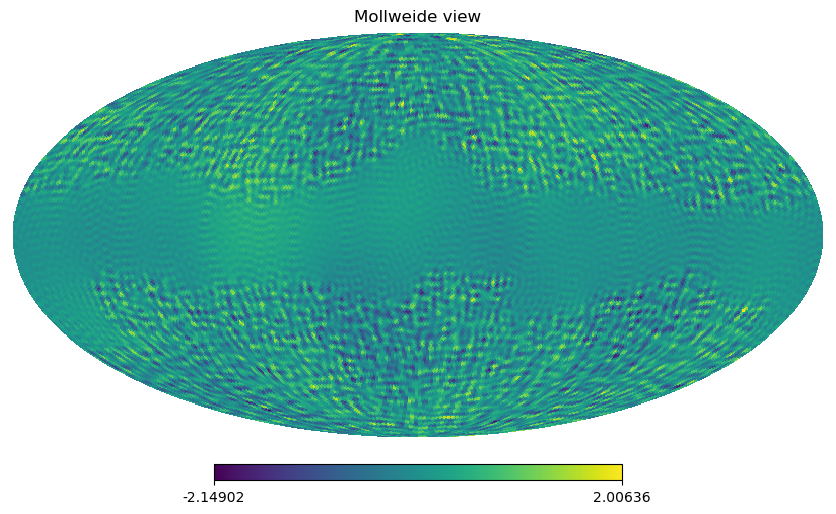

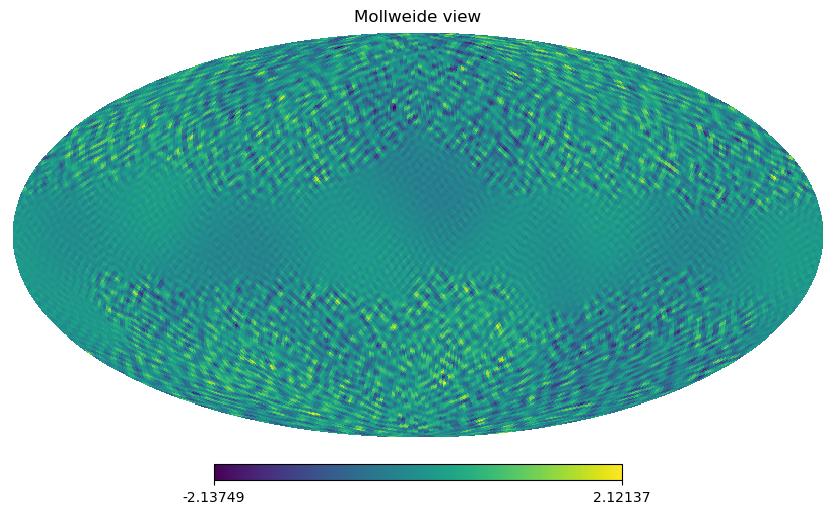

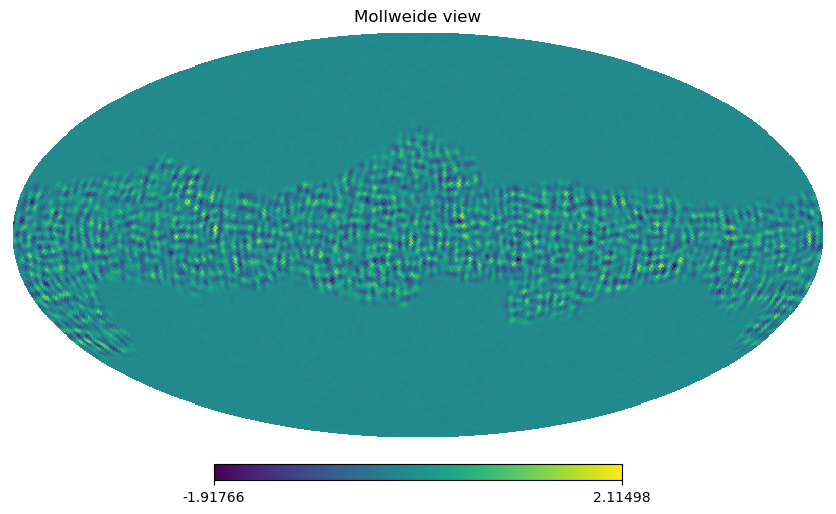

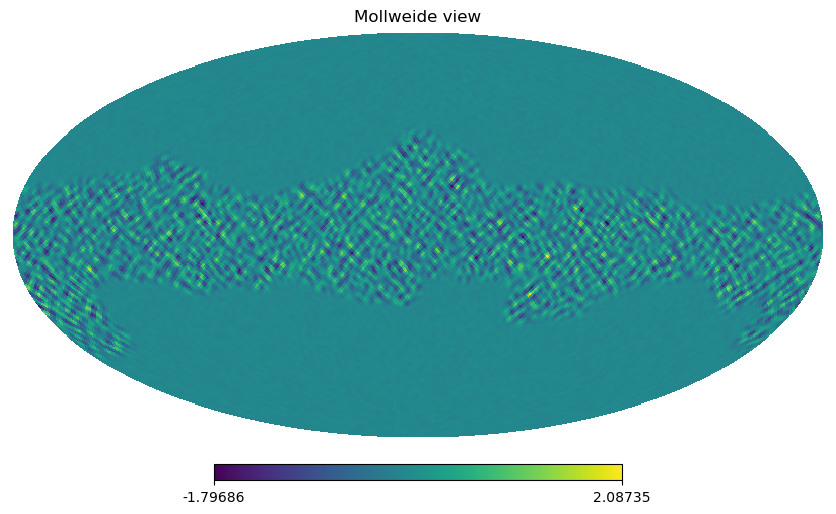

In [29]:
for i in range(2):
    hp.mollview(WF_map_2d[i])
for i in range(2):
    hp.mollview(fluct_map_2e[i])

## Results

In [30]:
n_correl_to_plot = int(np.ceil(MICMAC_sampler_obj.nstokes**2/2) + np.floor(MICMAC_sampler_obj.nstokes/2))

if MICMAC_sampler_obj.nstokes == 3:
    number_subplots_convention = 421
    figsize = (10,10)
    figsize_big = (12,12)
    position_legend = int(n_correl_to_plot/2)-1
    bbox_to_anchor=(2.2, 1)
elif MICMAC_sampler_obj.nstokes == 2:
    number_subplots_convention = 131
    figsize = (14,6)
    figsize_big = figsize
    position_legend = n_correl_to_plot-1
    bbox_to_anchor=(1, 1)
else:
    number_subplots_convention = 111
    figsize = (10,10)
    figsize_big = (10,10)
    position_legend = int(n_correl_to_plot/2)-1
    bbox_to_anchor=(2.2, 1)

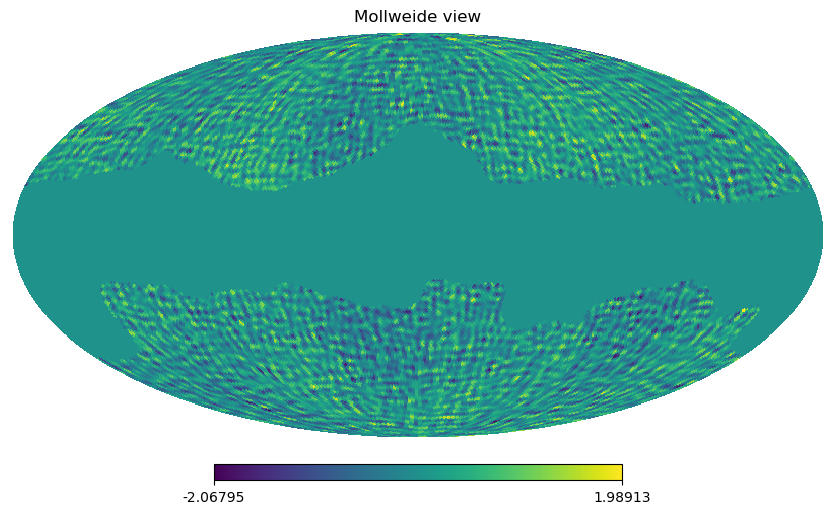

In [31]:
hp.mollview(s_cML[0])

In [32]:
# WF_map_2d = WF_map_2d*MICMAC_sampler_obj.mask

/Users/mag/miniconda3/envs/non_param_silver/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  fig.canvas.print_figure(bytes_io, **kw)


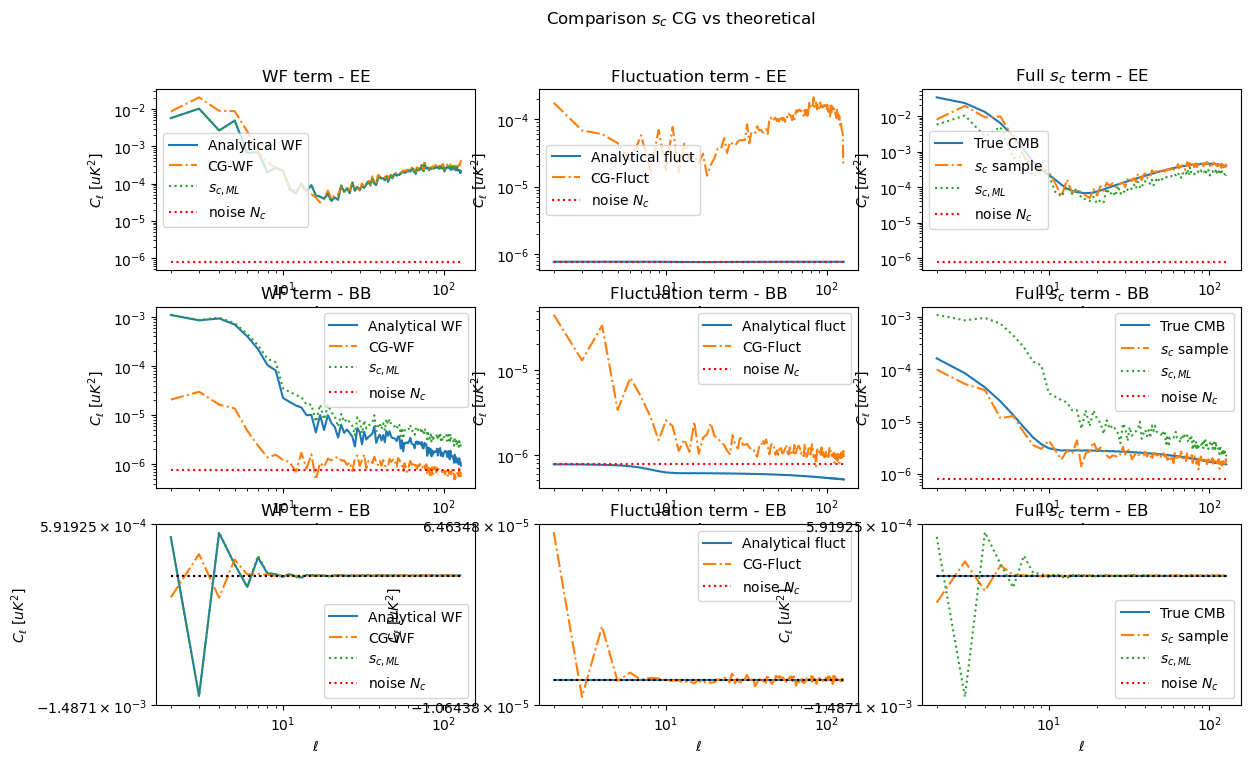

In [33]:
list_correl = ['EE', 'BB', 'EB']

c_ell_true_CMB = micmac.get_c_ells_from_red_covariance_matrix(theoretical_red_cov_r0_total + MICMAC_sampler_obj.r_true*theoretical_red_cov_r1_tensor)#[indices_polar, :]

ell_arange = np.arange(red_cov_matrix_sample.shape[0]) + MICMAC_sampler_obj.lmin

# _cl_noise_harm = 1/MICMAC_sampler_obj.freq_noise_c_ell[0,0,lmin:]
_cl_noise_harm = micmac.get_Cl_noise(np.array(instrument['depth_p']), mixing_matrix_sampled.mean(axis=2), lmax)[0,0,lmin:]
red_cl_noise_harm = micmac.get_reduced_matrix_from_c_ell(np.array([_cl_noise_harm,_cl_noise_harm,np.zeros_like(_cl_noise_harm)]))
cl_noise_harm = micmac.get_c_ells_from_red_covariance_matrix(red_cl_noise_harm)

analytical_WF_harm = np.linalg.pinv(np.linalg.pinv(red_cov_matrix_sample) + np.linalg.pinv(red_cl_noise_harm))

N_c_inv = jnp.copy(invBtinvNB[0,0])
N_c_inv = N_c_inv.at[...,MICMAC_sampler_obj.mask!=0].set(1/invBtinvNB[0,0,MICMAC_sampler_obj.mask!=0]/jhp.nside2resol(MICMAC_sampler_obj.nside)**2)
       
analytical_WF_map = micmac.maps_x_reduced_matrix_generalized_sqrt_sqrt(s_cML*N_c_inv,
                                                                    analytical_WF_harm, lmin=lmin, n_iter=n_iter)


full_map_s_c = WF_map_2d + fluct_map_2e
full_map_s_cML_extended = np.vstack([np.zeros_like(s_cML[0,...]), s_cML])
c_ell_s_cML = hp.anafast(full_map_s_cML_extended, lmax=MICMAC_sampler_obj.lmax, iter=MICMAC_sampler_obj.n_iter)[indices_polar,MICMAC_sampler_obj.lmin:]

analytical_WF_map_ext = np.vstack([np.zeros_like(analytical_WF_map[0]),analytical_WF_map])
analytical_WF_cells = hp.anafast(analytical_WF_map_ext, lmax=MICMAC_sampler_obj.lmax, iter=MICMAC_sampler_obj.n_iter)[indices_polar,MICMAC_sampler_obj.lmin:]
analytical_fluct_c_ell = micmac.get_c_ells_from_red_covariance_matrix(analytical_WF_harm.copy())#[indices_polar,lmin:]

s_c_WF_maps_extended = np.vstack([np.zeros_like(WF_map_2d[0]), WF_map_2d])
c_ells_s_c_WF = hp.anafast(s_c_WF_maps_extended, lmax=MICMAC_sampler_obj.lmax, iter=MICMAC_sampler_obj.n_iter)[indices_polar,MICMAC_sampler_obj.lmin:]

s_c_fluct_maps_extended = np.vstack([np.zeros_like(fluct_map_2e[0]), fluct_map_2e])
c_ells_s_c_fluct = hp.anafast(s_c_fluct_maps_extended, lmax=MICMAC_sampler_obj.lmax, iter=MICMAC_sampler_obj.n_iter)[indices_polar,MICMAC_sampler_obj.lmin:]

s_c_recovered = WF_map_2d + fluct_map_2e
s_c_recovered_ext = np.vstack([np.zeros_like(s_c_recovered[0]),s_c_recovered])
c_ells_s_c = hp.anafast(s_c_recovered_ext, lmax=MICMAC_sampler_obj.lmax, iter=MICMAC_sampler_obj.n_iter)[indices_polar,MICMAC_sampler_obj.lmin:]

plt.figure(figsize=(14,8))
plt.suptitle(r"Comparison $s_c$ CG vs theoretical")

for j in range(n_correl_to_plot):
    plt.subplot(331+3*j)
    plt.plot(np.arange(c_ells_s_c_WF.shape[-1])+MICMAC_sampler_obj.lmin, analytical_WF_cells[j,:], label='Analytical WF')
    plt.plot(np.arange(c_ells_s_c_WF.shape[-1])+MICMAC_sampler_obj.lmin, c_ells_s_c_WF[j,:], '-.', label='CG-WF')
    plt.plot(np.arange(c_ells_s_c_fluct.shape[-1])+MICMAC_sampler_obj.lmin, c_ell_s_cML[j,:], ':', label='$s_{c,ML}$')
    plt.plot(np.arange(c_ells_s_c_fluct.shape[-1])+MICMAC_sampler_obj.lmin, cl_noise_harm[j,:], 'r:', label='noise $N_c$')
    if j <= MICMAC_sampler_obj.nstokes-1:
        plt.loglog()
    else:
        plt.xscale('log')
        plt.yscale('symlog')
        plt.plot([MICMAC_sampler_obj.lmin,MICMAC_sampler_obj.lmax+1], [0,0], 'k:')
    plt.title('WF term - {}'.format(list_correl[j]))
    plt.ylabel("$C_\ell$ [$uK^2$]")
    plt.xlabel(r"$\ell$")
    plt.legend()

    plt.subplot(332+3*j)
    plt.plot(np.arange(c_ells_s_c_fluct.shape[-1])+MICMAC_sampler_obj.lmin, analytical_fluct_c_ell[j,:], label='Analytical fluct')
    plt.plot(np.arange(c_ells_s_c_fluct.shape[-1])+MICMAC_sampler_obj.lmin, c_ells_s_c_fluct[j,:], '-.', label='CG-Fluct')
    plt.plot(np.arange(c_ells_s_c_fluct.shape[-1])+MICMAC_sampler_obj.lmin, cl_noise_harm[j,:], 'r:', label='noise $N_c$')

    if j <= MICMAC_sampler_obj.nstokes-1:
        plt.loglog()
    else:
        plt.xscale('log')
        plt.yscale('symlog')
        plt.plot([MICMAC_sampler_obj.lmin,MICMAC_sampler_obj.lmax+1], [0,0], 'k:')
    plt.title('Fluctuation term - {}'.format(list_correl[j]))
    plt.ylabel("$C_\ell$ [$uK^2$]")
    plt.xlabel(r"$\ell$")
    plt.legend()
    
    plt.subplot(333+3*j)
    plt.plot(np.arange(c_ells_s_c_WF.shape[-1])+MICMAC_sampler_obj.lmin, c_ell_true_CMB[j,:], label='True CMB')
    plt.plot(np.arange(c_ells_s_c_fluct.shape[-1])+MICMAC_sampler_obj.lmin, c_ells_s_c[j,:], '-.', label='$s_c$ sample')
    plt.plot(np.arange(c_ells_s_c_fluct.shape[-1])+MICMAC_sampler_obj.lmin, c_ell_s_cML[j,:], ':', label='$s_{c,ML}$')
    plt.plot(np.arange(c_ells_s_c_fluct.shape[-1])+MICMAC_sampler_obj.lmin, cl_noise_harm[j,:], 'r:', label='noise $N_c$')

    if j <= MICMAC_sampler_obj.nstokes-1:
        plt.loglog()
        plt.plot([MICMAC_sampler_obj.lmin,MICMAC_sampler_obj.lmax+1], [0,0], 'k:')
    else:
        plt.xscale('log')
        plt.yscale('symlog')
        plt.plot([MICMAC_sampler_obj.lmin,MICMAC_sampler_obj.lmax+1], [0,0], 'k:')
    plt.title('Full $s_c$ term - {}'.format(list_correl[j]))
    plt.ylabel("$C_\ell$ [$uK^2$]")

    plt.xlabel(r"$\ell$")
    plt.legend()
plt.show()

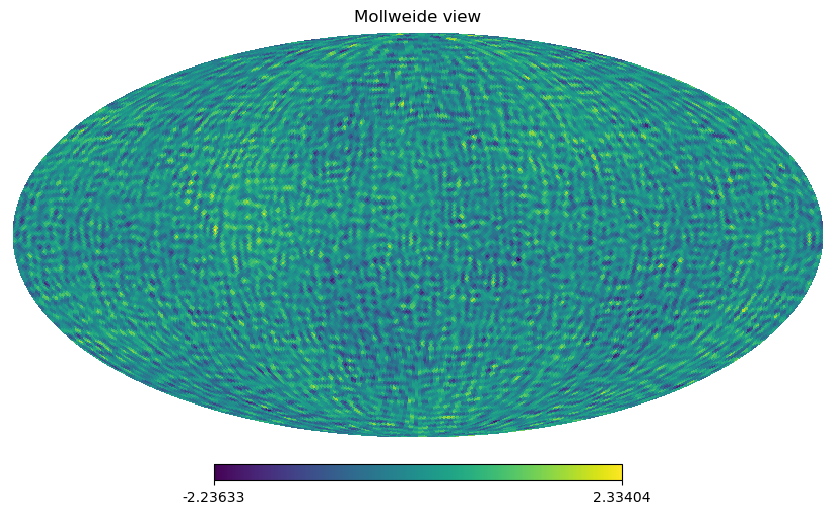

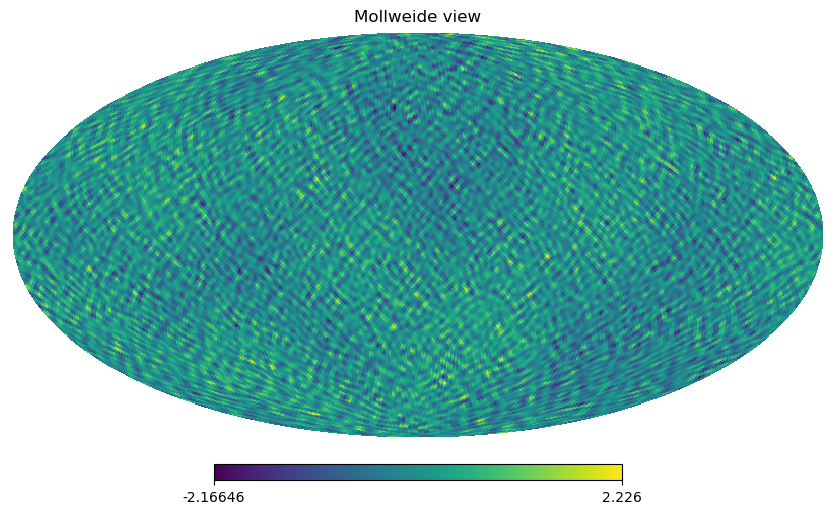

In [34]:
for i in range(2):
    hp.mollview(s_c_recovered[i])